In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), input_shape = (32,32,3), activation='relu'))
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 128, kernel_size = (5,5), activation='relu'))
model.add(Conv2D(filters = 128, kernel_size = (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 727,114 (2.77 MB)

 Trainable params: 727,114 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
cifar10 = keras.datasets.cifar10
(train_data, train_label), (test_data, test_label) = cifar10.load_data()
train_label_original = train_label
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

C:\Users\USER\AppData\Local\Temp\ipykernel_5240\1112464099.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(category[int(train_label_original[0])])


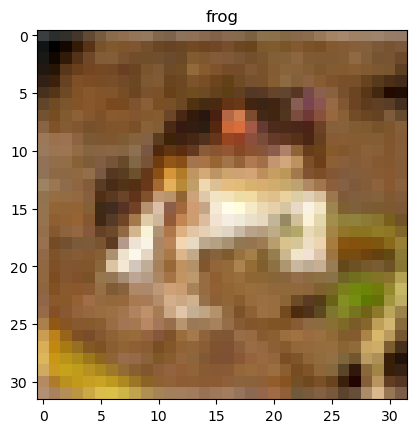

[6]


In [3]:
import matplotlib.pyplot as plt
category = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.imshow(train_data[0])
plt.title(category[int(train_label_original[0])])
plt.show()
print(train_label_original[0])

In [4]:
train_history = model.fit(train_data, train_label, epochs = 30, batch_size = 512)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.1459 - loss: 39.8942
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.2125 - loss: 2.4905
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.2739 - loss: 2.1189
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.3228 - loss: 1.9270
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.3808 - loss: 1.8619
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.4210 - loss: 1.6667
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.5007 - loss: 1.4328
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.5180 - loss: 1.4060
Epoch 9/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.5734 - loss: 1.2518
Epoch 10/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5902 - loss: 1.2224
Epoch 11/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6594 - loss: 0.9824
Epoch 12/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy

In [5]:
score = model.evaluate(test_data, test_label)
print(score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6118 - loss: 3.0721
0.6021999716758728


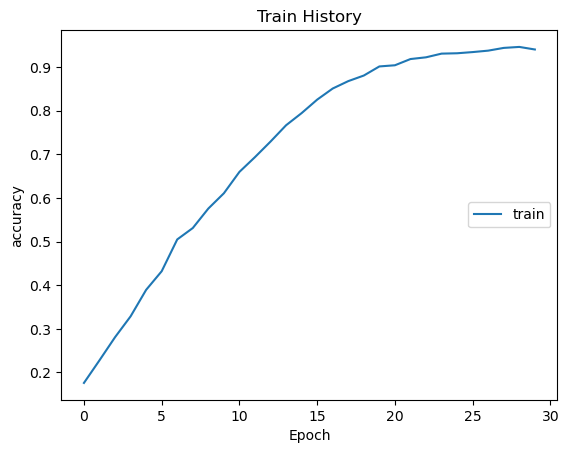

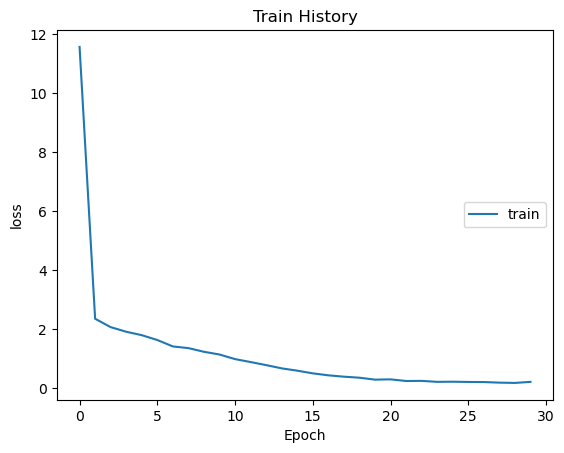

In [6]:
# 繪製正確性與損失歷史圖
import matplotlib.pyplot as plt
import numpy as np

def show_train_history(train_history, train):
    plt.plot(train_history.history[train])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy')
show_train_history(train_history, 'loss')